In [1]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import adam_v2 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

In [2]:
#cloning the rep containing traffic sign dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [3]:
#list dataset contents
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [4]:
#load the dataset
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [ ]:
data

In [6]:
#loading pickled dataset
with open("german-traffic-signs/train.p",mode='rb')as training:
  train = pickle.load(training)
with open("german-traffic-signs/valid.p",mode='rb')as validation:
  valid = pickle.load(validation)
with open("german-traffic-signs/test.p",mode='rb')as testing:
  test = pickle.load(testing)

In [7]:
X_train,y_train=train['features'],train['labels']
X_validation,y_validation=valid['features'],valid['labels']
X_test,y_test=test['features'],test['labels']

In [8]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
index = np.random.randint(1,len(X_train))
plt.imshow(X_train[index])
print("image label={}".format(y_train[index]))

In [10]:
#shuffle the data
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)

In [11]:
def preprocessing(img):
  #convert to greyscale
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #Applying Histogram Equalization
  img=cv2.equalizeHist(img)
  #Equalization
  img=img/255
  return img

In [12]:
X_train_processed=np.array(list(map(preprocessing,X_train)))
X_validation_processed=np.array(list(map(preprocessing,X_validation)))
X_test_processed=np.array(list(map(preprocessing,X_test)))

In [13]:
X_train_processed=X_train_processed.reshape(34799,32,32,1)
X_test_processed=X_test_processed.reshape(12630,32,32,1)
X_validation_processed=X_validation_processed.reshape(4410,32,32,1)

In [14]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(X_validation_processed.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


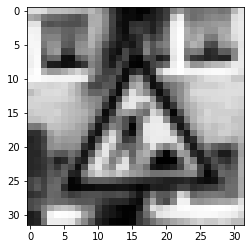

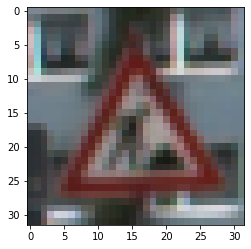

In [18]:
i = random.randint(1,len(X_train))
plt.imshow(X_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i].squeeze())